In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# **Newton-Raphson method**
The Newton-Raphson method is a method of finding roots of a nonlinear function. Unlike the Bisection method, it falls under the category of **Open methods** due to the fact that we only need one initial guess that does not have to bracket the actual root.

In today's lab, we will be implementing the Newton-Raphson method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3+x-2$, then in python we will create an array as follows:

In [ ]:
f = [1,0,1,-2]

[1, 0, 1, -2]


Note that your implementation should be able to handle the array `f` of any size, which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array `f` given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array `f` and a point `x` as input and evaluate the value of the function at that point x using a loop and return that value.

This function will be called in the other function that you will implement, which is as follows:
```
newtonraphson(f, x_init, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute Relative Approximate Error $|\epsilon_a|$ of at most epsilon (%). Note that, here epsilon is the Relative Error Tolerance $\epsilon_s$.

You will also need a function to calculate the derivative $f'(x)$ at some value of $x$.
```
derivative(f, x)
```

## Task 1: The Function

In [ ]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    result = f[0]

    # Evaluate the polynomial using Horner's method
    n=len(f)
    result=0
    for i in range(n):
      result += f[i]*x**(n-i-1)
    return result

In [ ]:
f = [1,0,1,-2]
print(func(f,2))
print(func(f,3))
print(func(f,5))

8
28
128


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$8
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$128

## Task 2: The Derivative of the Function

In [ ]:
# Write a function for evaluating the derivative of the polynomial given by array f
def derivative(f, x):
    # Write your code here
    n=len(f)
    result=0
    for i in range(n):
      result += (n-i-1)*f[i]*x**(n-i-2)
    return result

In [ ]:
f = [1,0,1,-2]
print(derivative(f,2))
print(derivative(f,3))
print(derivative(f,5))

13.0
28.0
76.0


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$13
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$76

## Task 3: The Algorithm
Now, its time to implement the whole algorithm. Take the initial guess as $2$, the Relative Error Tolerance $\epsilon_s$ as $0.01$, and the maximum number of iterations as $10000$.

In [ ]:
x_init = 2
epsilon = 0.01
MAX_ITERS=10000


def newtonraphson(f, x_init, epsilon):
  # Write your code here
    x_next = x_init
    iter_count = 0

    while iter_count < MAX_ITERS:
        fx = func(f, x_next)
        fx_prime = derivative(f, x_next)

        if abs(fx) < epsilon:
            return x_next

        x_next = x_next - fx / fx_prime

        iter_count += 1

    return x_next

In [ ]:
# Test your function here
print(newtonraphson(f, x_init, epsilon))

1.0000170707310327


The value should be very very close to $1$. (*e.g.* $1.0000170707310327$)<br>
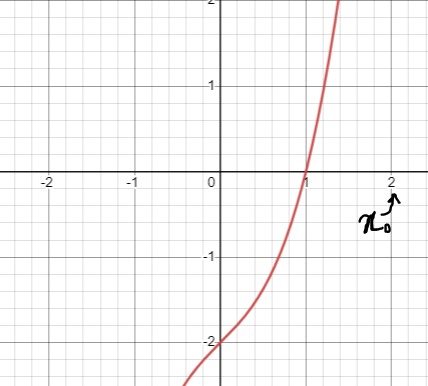

## Task 4: Plotting
In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

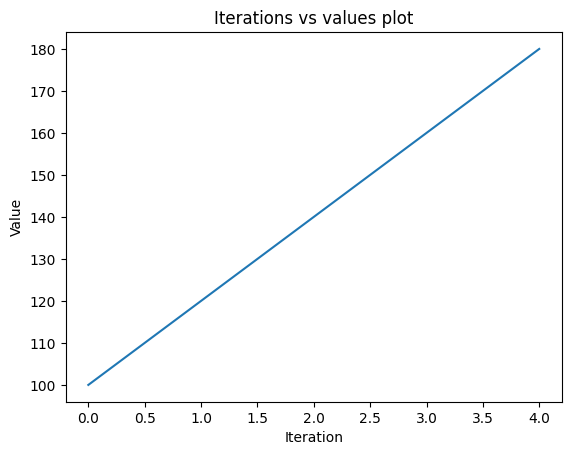

In [ ]:
iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_i)$ along the $Y$-axis.

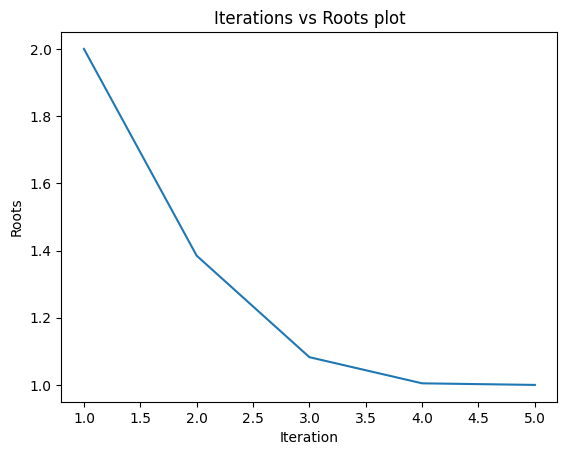

In [ ]:
def newtonraphson(f, x_init, epsilon):
  # Write your code here
    x_next = x_init
    iter_count = 0
    root=[]
    root.append(x_init)

    while iter_count < MAX_ITERS:
        fx = func(f, x_next)
        fx_prime = derivative(f, x_next)

        if abs(fx) < epsilon:
            return x_next,iter_count,root

        x_next = x_next - fx / fx_prime

        iter_count += 1
        root.append(x_next);

    return x_next,iter_count,root


iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

x_next,iter_count,root = newtonraphson(f, x_init, epsilon)

plt.plot(range(1, iter_count+2), root)
plt.title("Iterations vs Roots plot")
plt.xlabel("Iteration")
plt.ylabel("Roots")
plt.show()



Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

[1 2 3 4]
[0.4444444444444445, 0.2789886660854405, 0.07743560616431926, 0.004763198019567617]


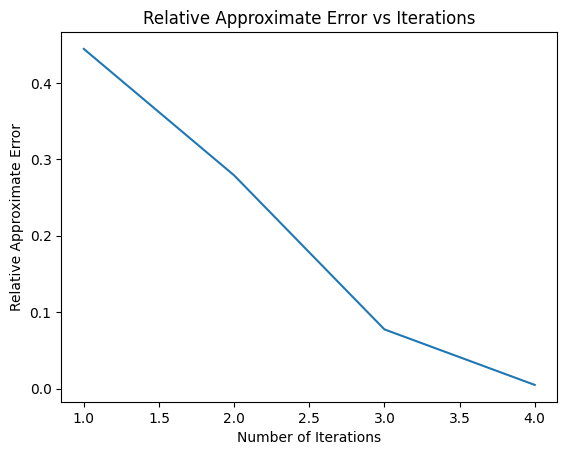

In [ ]:
def newtonraphson(f, x_init, epsilon):
    x_next = x_init
    iter_count = 0
    root = []
    root.append(2)

    while iter_count < MAX_ITERS:
        fx = func(f, x_next)
        fx_prime = derivative(f, x_next)

        if abs(fx) < epsilon:
            return x_next, iter_count, root

        x_next = x_next - fx / fx_prime

        iter_count += 1
        root.append(x_next)

    return x_next, iter_count, root

x_next, iter_count, root = newtonraphson(f, x_init, epsilon)

relative_errors = [abs((root[i] - root[i-1]) / root[i]) for i in range(1, len(root))]

iterations = np.arange(1, len(root))

print(iterations)
print(relative_errors)

plt.plot(iterations, relative_errors)
plt.title("Relative Approximate Error vs Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Relative Approximate Error")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

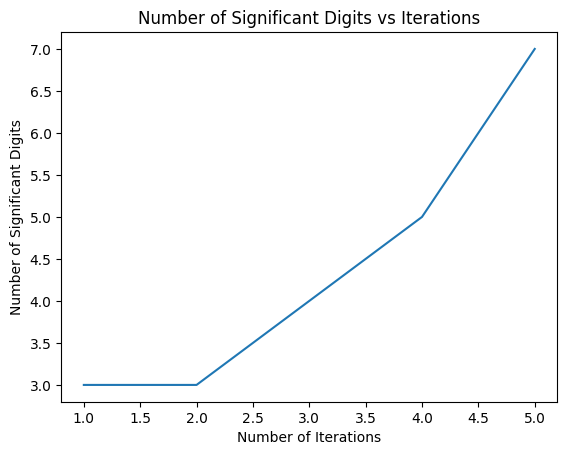

In [ ]:
def significant_digits(approximation, true_value):
    return 2-int(np.floor(np.log10(abs(approximation - true_value))))
def newtonraphson(f, x_init, epsilon):
    x_next = x_init
    iter_count = 0
    root = []
    root.append(2)

    while iter_count < MAX_ITERS:
        fx = func(f, x_next)
        fx_prime = derivative(f, x_next)

        if abs(fx) < epsilon:
            return x_next, iter_count, root

        x_next = x_next - fx / fx_prime

        iter_count += 1
        root.append(x_next)

    return x_next, iter_count+1, root

x_next, iter_count, root = newtonraphson(f, x_init, epsilon)

true_root = np.roots(f)[-1]  # Actual root of the polynomial
significant_digits_list = [significant_digits(root[i], true_root) for i in range(len(root))]

iterations = np.arange(1, len(root) + 1)

# Plot the graph
plt.plot(iterations, significant_digits_list)
plt.title("Number of Significant Digits vs Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Number of Significant Digits")
plt.show()